## Data Balancing

In [41]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import scipy as sp
from io import StringIO
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import collections
from sklearn.svm import SVC
#from sklearn.metrics import decision_function
from sklearn.metrics import roc_curve

In [2]:
data_x = pd.read_csv('tornado-xtrain.csv')

In [3]:
data_y = pd.read_csv('tornado-ytrain.csv',header=None).drop(0,axis = 1)[1]

In [4]:
X = preprocessing.scale(data_x)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [5]:
Y = data_y

In [6]:
#### Use Stratify = Y

# How stratify works This stratify parameter makes a split
# so that the proportion of values in the sample produced 
# will be the same as the proportion of values provided to parameter stratify.
# For example, if variable y is a binary categorical variable with values 0 and 1
# and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split
# has 25% of 0's and 75% of 1's.

# apply SMOTE only to training set, test set does not have to be balanced
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)
sm = SMOTE(sampling_strategy = 'not majority')

In [7]:
x_train_balanced, y_train_balanced = sm.fit_resample(x_train, y_train)

## Decision Tree MultiClass Classifier

### Default Parameters

In [9]:
# default decision tree and confusion matrix
dt_default = DecisionTreeClassifier().fit(x_train_balanced, y_train_balanced)
y_pred_dt_default = dt_default.predict(x_test)
conf_matrix_dt_default = confusion_matrix(y_test, y_pred_dt_default)
conf_matrix_percentage_dt_default = [np.round(conf_matrix_dt_default[i]/sum(conf_matrix_dt_default[i])*100,0) for i in range(len(conf_matrix_dt_default))]
print("f1 score: ", f1_score(y_test, y_pred_dt_default, average = 'macro'))
conf_matrix_percentage_dt_default

f1 score:  0.5124953560293755


[array([90.,  9.,  1.]), array([64., 26., 10.]), array([14., 24., 62.])]

### Tuning split and leaf with cross-validation

In [10]:
min_samples_split_values = list(range(2,200,20))
min_samples_leaf_values = list(range(1,60,6))

In [11]:
k = 5
plotting_data_dt = []
kf = KFold(n_splits=k)    
for train_index, test_index in kf.split(x_train_balanced):
    X_cv_train, X_cv_validate = pd.DataFrame(x_train_balanced).iloc[train_index], pd.DataFrame(x_train_balanced).iloc[test_index]
    Y_cv_train, Y_cv_validate = pd.DataFrame(y_train_balanced).iloc[train_index], pd.DataFrame(y_train_balanced).iloc[test_index]
    for i in min_samples_split_values:
        for j in min_samples_leaf_values:
            dt = DecisionTreeClassifier(min_samples_split = i, min_samples_leaf=j).fit(X_cv_train, Y_cv_train)
            y_pred = dt.predict(X_cv_validate)
            row = [i ,j, f1_score(Y_cv_validate, y_pred, average = 'macro')]
            plotting_data_dt.append(row)            

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined an

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined an

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined an

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined an

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined an

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined an

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined an

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined an

In [12]:
plotting_dt = pd.DataFrame(plotting_data_dt)
plotting_dt = plotting_dt.rename(columns={ 0: 'Min_Samples_Split', 1: 'Min_Samples_Leaf', 2: 'f1_score'})
average_values_dt = plotting_dt.groupby(['Min_Samples_Split','Min_Samples_Leaf']).mean().reset_index()

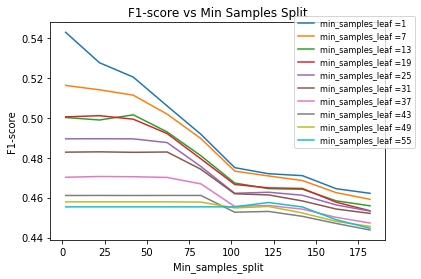

<Figure size 1080x576 with 0 Axes>

In [13]:
for i in min_samples_leaf_values:
    plt.plot(average_values_dt['Min_Samples_Split'][average_values_dt['Min_Samples_Leaf'] == i], average_values_dt['f1_score'][average_values_dt['Min_Samples_Leaf'] == i], label = "min_samples_leaf =" + str(i))
plt.legend(prop={'size': 8}, bbox_to_anchor=(1.1, 1.05))
plt.title("F1-score vs Min Samples Split")
plt.ylabel("F1-score")
plt.xlabel("Min_samples_split")
plt.figure(figsize=(15,8))
plt.show()

### Best hyperparameters: min_samples_split = 2,min_samples_leaf=1

In [14]:
average_values_dt[average_values_dt['f1_score'] == average_values_dt['f1_score'].max()]

,Min_Samples_Split,Min_Samples_Leaf,f1_score
0,2,1,0.543037


### Tuned Decision Tree Results

In [15]:
dt_tuned = DecisionTreeClassifier(min_samples_split = 2,min_samples_leaf=1).fit(x_train_balanced, y_train_balanced)
y_pred_dt_tuned = dt_tuned.predict(x_test)
print(f1_score(y_test, y_pred_dt_tuned, average = 'macro'))
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt_tuned)
conf_matrix_dt_percentage = [np.round(conf_matrix_dt[i]/sum(conf_matrix_dt[i])*100,0) for i in range(len(conf_matrix_dt))]
print("f1 score: ", f1_score(y_test, y_pred_dt_tuned, average = 'macro'))
conf_matrix_dt_percentage

0.5026290014200496
f1 score:  0.5026290014200496


[array([91.,  9.,  1.]), array([65., 24., 11.]), array([10., 33., 57.])]

Text(0.5,1,'Decision Tree Confusion Matrix Heatmap')

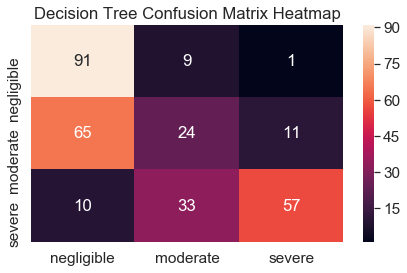

In [16]:
df_cm = pd.DataFrame(conf_matrix_dt_percentage, index = ['negligible','moderate','severe'], columns = ['negligible','moderate','severe'])
plt.figure(figsize = (7,4))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True)
plt.title("Decision Tree Confusion Matrix Heatmap")

### Decision Tree Feature Importances

In [17]:
dict(zip(dt.feature_importances_,data_x.columns))

{0.016772740831862375: 'EVENT_ID',
 0.014673684823767361: 'median_income',
 0.0439455767894066: 'population_density',
 0.04319359178102938: 'housing_units_density',
 0.022547064715562348: 'duration',
 0.007210428353295293: 'weekend',
 0.021307138721897167: 'sin_time',
 0.02879465317005775: 'cos_time',
 0.0145510379723232: 'sin_date',
 0.0091680119818927: 'cos_date',
 0.35895911862884555: 'tornado_intensity',
 0.21011971039732497: 'tornado_area',
 0.012289362526296997: 'average_range',
 0.14531577635181658: 'minimum_range',
 0.029500257096135282: 'average_latitude',
 0.008787911279304303: 'average_longitude',
 0.01286393457918233: 'percent_land',
 0.0: 'multi_vortex'}

### Most important features are tornado_intensity', 'tornado_area' and  'minimum_range'.

### Random Forest Classifier

### Default Parameters

In [18]:
rf_default = RandomForestClassifier().fit(x_train_balanced, y_train_balanced)
y_pred_rf_default = rf_default.predict(x_test)
conf_matrix_rf_default = confusion_matrix(y_test, y_pred_rf_default)
conf_matrix_rf_percentage_default = [np.round(conf_matrix_rf_default[i]/sum(conf_matrix_rf_default[i])*100,0) for i in range(len(conf_matrix_rf_default))]
print("f1 score: ", f1_score(y_test, y_pred_rf_default, average = 'macro'))
conf_matrix_rf_default

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


f1 score:  0.5529094188168343


array([[2045,  110,    7],
       [  92,   56,   11],
       [   0,   12,    9]])

### Tuning on n_estimators and max_depth

In [20]:
estimators = [10,100,500,1000]
maxdepth = [None,20,40,60,80]
plotting_data_rf = []
for i in estimators:
    for j in maxdepth:
        rf = RandomForestClassifier(n_estimators = i, max_depth = j).fit(x_train_balanced, y_train_balanced)
        y_pred_rf = rf.predict(x_test)
        row = [i ,j, f1_score(y_test, y_pred_rf, average = 'macro')]
        plotting_data_rf.append(row)

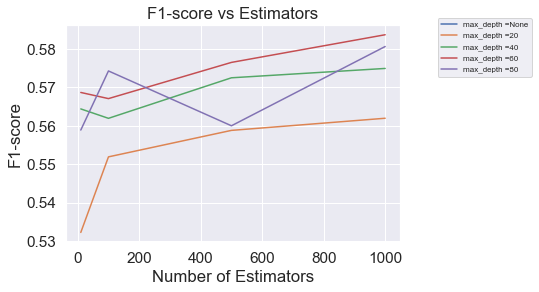

<Figure size 1080x576 with 0 Axes>

In [21]:
plotting_rf = pd.DataFrame(plotting_data_rf)
for i in maxdepth:
    plt.plot(plotting_rf[0][plotting_rf[1] == i], plotting_rf[2][plotting_rf[1] == i], label = "max_depth =" + str(i))
plt.legend(prop={'size': 8}, bbox_to_anchor=(1.1, 1.05))
plt.title("F1-score vs Estimators")
plt.ylabel("F1-score")
plt.xlabel("Number of Estimators")
plt.figure(figsize=(15,8))
plt.show()

### Best parameters -  n_estimators = 100, max_depth = 20

In [27]:
plotting_rf = plotting_rf.rename(columns={ 0: 'No of estimators', 1: 'Max Depth', 2: 'f1_score'})
plotting_rf[plotting_rf['f1_score'] == plotting_rf['f1_score'].max()]

,No of estimators,Max Depth,f1_score
10,500,NaN,0.585814


In [28]:
rf_tuned = RandomForestClassifier(n_estimators = 500, max_depth = None).fit(x_train_balanced, y_train_balanced)
y_pred_rf_tuned = rf_tuned.predict(x_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_default)
conf_matrix_rf_percentage = [np.round(conf_matrix_rf[i]/sum(conf_matrix_rf[i])*100,0) for i in range(len(conf_matrix_rf))]
print("f1 score: ", f1_score(y_test, y_pred_rf_tuned, average = 'macro'))
conf_matrix_rf_percentage

f1 score:  0.5728162124388539


[array([95.,  5.,  0.]), array([58., 35.,  7.]), array([ 0., 57., 43.])]

Text(0.5,1,'Random Forest Confusion Matrix Heatmap')

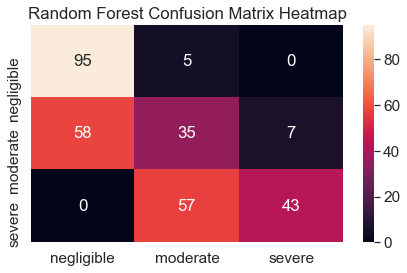

In [29]:
df_cm = pd.DataFrame(conf_matrix_rf_percentage, index = ['negligible','moderate','severe'], columns = ['negligible','moderate','severe'])
plt.figure(figsize = (7,4))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True)
plt.title("Random Forest Confusion Matrix Heatmap")

In [ ]:
#from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#gbc = GradientBoostingClassifier().fit(x_train_balanced, y_train_balanced)
#y_pred_gbc = gbc.predict(x_test)

In [ ]:
#f1_score(y_test, y_pred_gbc, average = 'macro')

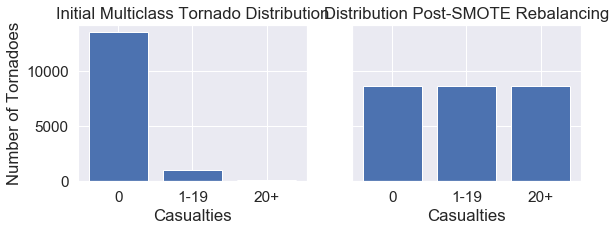

In [32]:
# Visualize multiclass redistribution using SMOTE

balanced_counts = collections.Counter(y_train_balanced)

mt = pd.read_csv('tornadoes-multiclass.csv', index_col='EVENT_ID')
mt = mt.astype(float)
mt_counts = mt['multiclass_casualties'].value_counts().sort_index()

fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].bar(['0', '1-19', '20+'], mt_counts)
axs[0].set_xlabel('Casualties')
axs[0].set_ylabel('Number of Tornadoes')
axs[0].title.set_text('Initial Multiclass Tornado Distribution')
axs[1].bar(['0', '1-19', '20+'], balanced_counts.values())
axs[1].set_xlabel('Casualties')
axs[1].title.set_text('Distribution Post-SMOTE Rebalancing')
plt.subplots_adjust(top=0.85)
plt.show()

In [34]:
# Default Logistic Regression and evaluation

lr = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=200).fit(x_train_balanced, y_train_balanced)
lr_pred = lr.predict(x_test)
lr_prob = lr.predict_proba(x_test)[:,1]

lr_confusion = confusion_matrix(y_test, lr_pred)
lr_confusion_weighted = np.array([lr_confusion[i]/sum(lr_confusion[i]) for i in range(len(lr_confusion))])
lr_f1 = f1_score(y_test, lr_pred, average = 'macro')

print('Confusion Matrix\n'+str(lr_confusion))
print('\nConfusion Matrix with Weights\n'+str(lr_confusion_weighted))
print('\nF1 Score\n'+str(lr_f1))

Confusion Matrix
[[1821  294   47]
 [  54   65   40]
 [   0    6   15]]

Confusion Matrix with Weights
[[0.84227567 0.1359852  0.02173913]
 [0.33962264 0.40880503 0.25157233]
 [0.         0.28571429 0.71428571]]

F1 Score
0.4647163692402098


In [38]:
# Logistic Regression with built-in Cross-Validation

# cs = np.power(10, (np.arange(-8,2, dtype='float')))

lrcv = LogisticRegressionCV(multi_class='auto', solver='lbfgs', cv=10, max_iter=200, refit=False).fit(x_train_balanced, y_train_balanced)
lrcv_pred = lrcv.predict(x_test)
lrcv_prob = lrcv.predict_proba(x_test)[:,1]

lrcv_confusion = confusion_matrix(y_test, lrcv_pred)
lrcv_confusion_weighted = np.array([lrcv_confusion[i]/sum(lrcv_confusion[i]) for i in range(len(lrcv_confusion))])
lrcv_f1 = f1_score(y_test, lrcv_pred, average = 'macro')

print('Confusion Matrix\n'+str(lrcv_confusion))
print('\nConfusion Matrix with Weights\n'+str(lrcv_confusion_weighted))
print('\nF1 Score\n'+str(lrcv_f1))

Confusion Matrix
[[1852  263   47]
 [  58   63   38]
 [   0    5   16]]

Confusion Matrix with Weights
[[0.85661425 0.12164662 0.02173913]
 [0.36477987 0.39622642 0.23899371]
 [0.         0.23809524 0.76190476]]

F1 Score
0.47635488605568166


In [39]:
lrcv.get_params

<bound method BaseEstimator.get_params of LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=200,
           multi_class='auto', n_jobs=None, penalty='l2',
           random_state=None, refit=False, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)>

In [43]:
# Default SVM and evaluation

svm = SVC(gamma='scale').fit(x_train_balanced, y_train_balanced)
svm_pred = svm.predict(x_test)

svm_confusion = confusion_matrix(y_test, svm_pred)
svm_confusion_weighted = np.array([svm_confusion[i]/sum(svm_confusion[i]) for i in range(len(svm_confusion))])
svm_f1 = f1_score(y_test, svm_pred, average='macro')

print('Confusion Matrix\n'+str(svm_confusion))
print('\nConfusion Matrix with Weights\n'+str(svm_confusion_weighted))
print('\nF1 Score\n'+str(svm_f1))

Confusion Matrix
[[1907  242   13]
 [  62   77   20]
 [   2    8   11]]

Confusion Matrix with Weights
[[0.88205365 0.1119334  0.00601295]
 [0.38993711 0.48427673 0.12578616]
 [0.0952381  0.38095238 0.52380952]]

F1 Score
0.5260501075342775


In [45]:
# Define cross-validation function for SVM

def xValSVM(X, y, k, cs):
    k_folds = sklearn.model_selection.KFold(n_splits=k)
    F1s = {}
    
    for train_index, test_index in k_folds.split(X):
        xtrain, xval = pd.DataFrame(X).iloc[train_index], pd.DataFrame(X).iloc[test_index]
        ytrain, yval = pd.DataFrame(y).iloc[train_index], pd.DataFrame(y).iloc[test_index]
        ytrain = np.asarray(ytrain).ravel()
        yval = np.asarray(yval).ravel()
        for c in cs:
            svm = sklearn.svm.SVC(gamma='scale', C=c).fit(xtrain, ytrain)
            svm_pred = svm.predict(xval)
            f1 = f1_score(yval, svm_pred, average='macro')
            F1s.setdefault(c, []).extend([f1])

    return F1s

In [ ]:
# Run SVM through cross-validation function

cs = np.power(10, (np.arange(-8,2, dtype='float')))
F1s = xValSVM(x_train_balanced, y_train_balanced, 10, cs)

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:114

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

In [ ]:
# Select C hyperparameter for max F1 value

F1s = pd.DataFrame(F1s).transpose()
mean = F1s.mean()
F1s

In [ ]:
mean

In [ ]:
def xValSVM222(X, y, k, cs):
    k_folds = sklearn.model_selection.KFold(n_splits=k)
    F1s = {}
    
    for train_index, test_index in k_folds.split(X):
        xtrain, xval = pd.DataFrame(X).iloc[train_index], pd.DataFrame(X).iloc[test_index]
        ytrain, yval = pd.DataFrame(y).iloc[train_index], pd.DataFrame(y).iloc[test_index]
        ytrain = np.asarray(ytrain).ravel()
        yval = np.asarray(yval).ravel()
#         print(collections.Counter(ytrain))
        print(collections.Counter(yval))
        
F1s = xValSVM222(X_train_balanced, y_train_balanced, 10, cs)